# CREDIT SCORING ALGORITHM

Credit scoring algorithms estimate the probability that an applicant will default by comparing his or her current and historical data.
For this model we will be using the german credit dataset.

##### Perspective
It might be difficult to asses whether a bank's client is elidgible for a loan.
A credit scoring model makes it easier for banks to achieve this by taking into consideration factors such as number of jobs, amount in their savings and checking accounts and their credit amount.

##### Objective
Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit.

Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years.
The goal of this competition is to build a model that borrowers can use to help make the best financial decisions.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

## Conducting extensive data analysis on the dataset

### 1. LOADING THE DATASET

In [2]:
df=pd.read_csv(r"german_credit_data.csv")
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


### 2. Initial exploration
First few rows of the dataset

In [3]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
df=df.drop('Unnamed: 0', axis=1)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


### 3. Summary Statistics

In [5]:
df.describe()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


### 4. Data Types and Missing Values
Since the columns, Savings accounts and Checking account contain missing values, we will fill the NA's with 'none'.

In [6]:
df.isnull().sum()
df.fillna('none',inplace=True)
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,none,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,none,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,none,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,none,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


### 5. Distribution Visualization

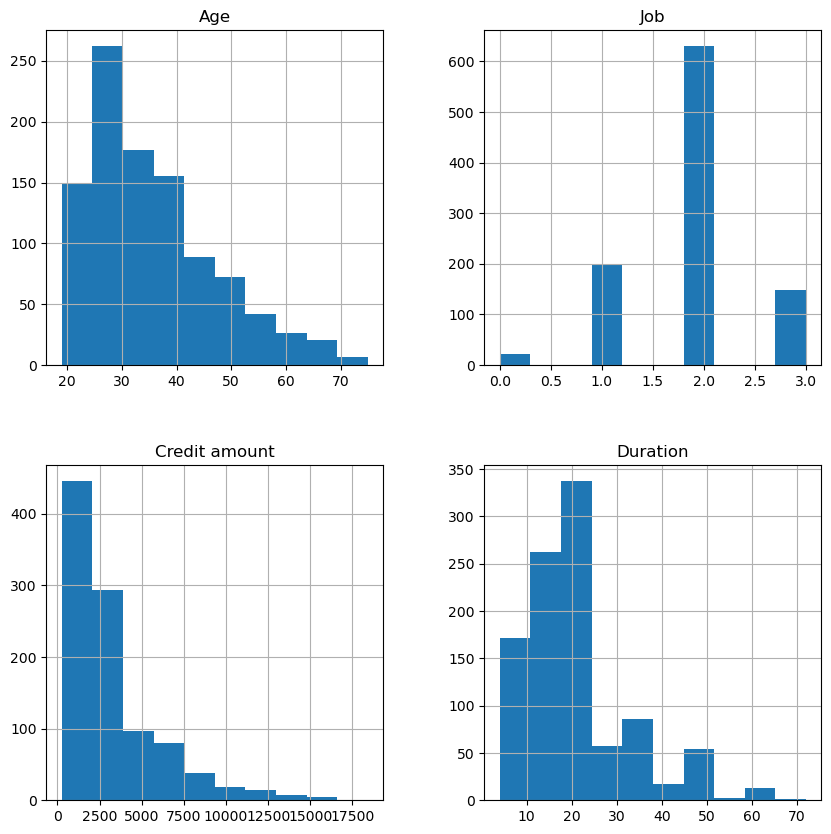

In [7]:
df.hist(figsize=(10, 10))
plt.show()


### 6. Categorical Variables
We will plot a count plot for the categorical variable 'Job' to have a clear visualization of the data.

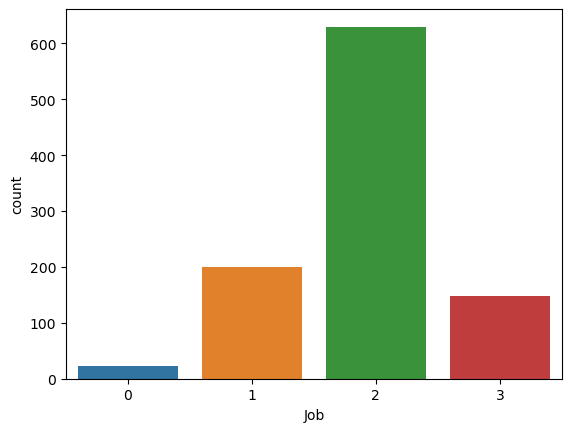

In [8]:
sns.countplot(x='Job', data=df)
plt.show()

### 7. Correlation Analysis
For this part we use LabelEncoder() to decode the string columns into categorical variables in order to compute the correlation coefficient for each variable.

In [9]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [10]:
df1=MultiColumnLabelEncoder(columns = ['Sex','Housing','Risk','Saving accounts','Checking account','Purpose']).fit_transform(df)
df1.head

<bound method NDFrame.head of      Age  Sex  Job  Housing  Saving accounts  Checking account  Credit amount  \
0     67    1    2        1                2                 0           1169   
1     22    0    2        1                0                 1           5951   
2     49    1    1        1                0                 2           2096   
3     45    1    2        0                0                 0           7882   
4     53    1    2        0                0                 0           4870   
..   ...  ...  ...      ...              ...               ...            ...   
995   31    0    1        1                0                 2           1736   
996   40    1    3        1                0                 0           3857   
997   38    1    2        1                0                 2            804   
998   23    1    2        0                0                 0           1845   
999   27    1    2        1                1                 1           4576  

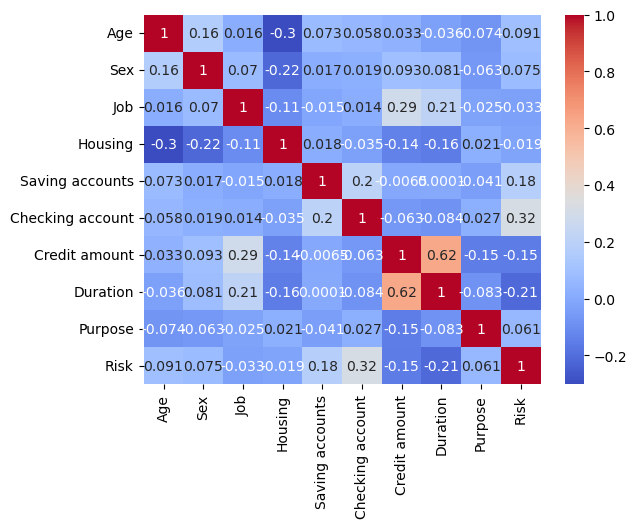

In [11]:
corr_matrix = df1.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

After computing the correlation, we plot a heatmap to visualise the correlation between each of the variables.

### 8. Target Variable Analysis
We do this by plotting a count plot for the categorical variable 'Risk'.

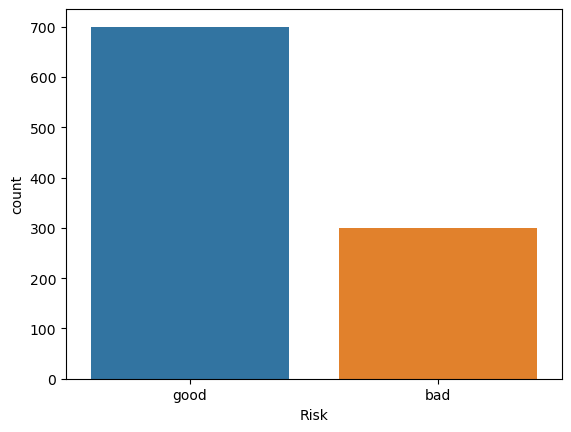

In [12]:
sns.countplot(x='Risk', data=df)
plt.show()

### 9. Outlier Detection

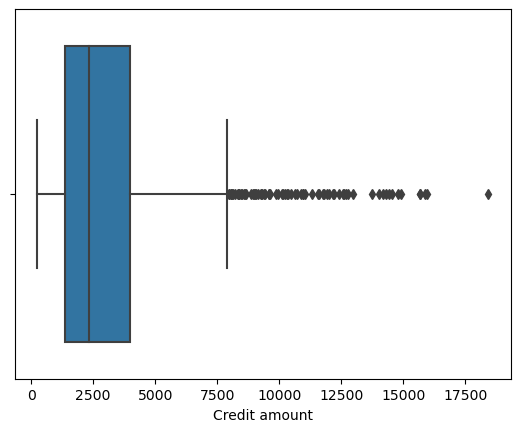

In [13]:
sns.boxplot(x='Credit amount', data=df)
plt.show()

### 10. Feature Relationships

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


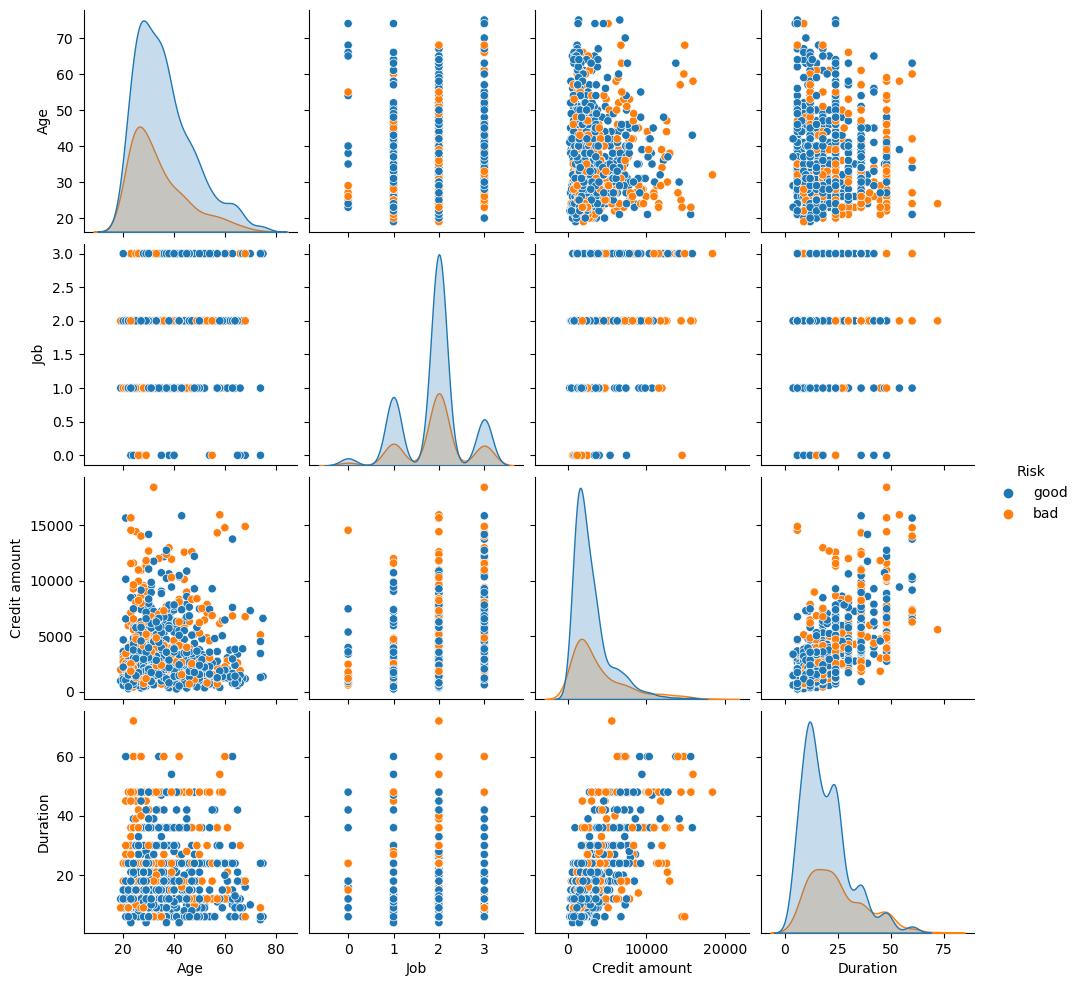

In [14]:
sns.pairplot(df, hue='Risk')
plt.show()

## MODELLING TECHNIQUE
For this model I deem Binary Logistic Regression as the most approprite model because our target variable 'Risk' is categorised as either good or bad. Therefore it will be easy to convert it to category first before proceeding on to fit the variables on to the model.  

In [15]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

#### We begin by converting our target varible to category.

In [16]:
df["Risk"] = df["Risk"].astype('category')
df.dtypes

Age                    int64
Sex                   object
Job                    int64
Housing               object
Saving accounts       object
Checking account      object
Credit amount          int64
Duration               int64
Purpose               object
Risk                category
dtype: object

In [17]:
df["Risk"] = df["Risk"].cat.codes
df.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,none,little,1169,6,radio/TV,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,0
2,49,male,1,own,little,none,2096,12,education,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,0
5,35,male,1,free,none,none,9055,36,education,1
6,53,male,2,own,quite rich,none,2835,24,furniture/equipment,1
7,35,male,3,rent,little,moderate,6948,36,car,1
8,61,male,1,own,rich,none,3059,12,radio/TV,1
9,28,male,3,own,little,moderate,5234,30,car,0


### Important variables for modelling.
I personally find all the varibles important in modelling since the all correlate with our target variable.
Therefore we begin by converting our variables into category in order to fit them into the model.

In [18]:
df["Sex"] = df["Sex"].astype('category')
df["Housing"] = df["Housing"].astype('category')
df["Saving accounts"] = df["Saving accounts"].astype('category')
df["Checking account"] = df["Checking account"].astype('category')
df["Purpose"] = df["Purpose"].astype('category')
df["Sex"] = df["Sex"].cat.codes
df["Housing"] = df["Housing"].cat.codes
df["Saving accounts"] = df["Saving accounts"].cat.codes
df["Checking account"] = df["Checking account"].cat.codes
df["Purpose"] = df["Purpose"].cat.codes

df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,1,2,0,1169,6,5,1
1,22,0,2,1,0,1,5951,48,5,0
2,49,1,1,1,0,2,2096,12,3,1
3,45,1,2,0,0,0,7882,42,4,1
4,53,1,2,0,0,0,4870,24,1,0
...,...,...,...,...,...,...,...,...,...,...
995,31,0,1,1,0,2,1736,12,4,1
996,40,1,3,1,0,0,3857,30,1,1
997,38,1,2,1,0,2,804,12,5,1
998,23,1,2,0,0,0,1845,45,5,0


## BUILDING THE MODEL.

In [19]:
X = df.drop('Risk', axis=1)  # Features
y = df['Risk']  # Target variable

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [22]:
y_pred = model.predict(X_test)

In [23]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.755

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.36      0.46        59
           1       0.77      0.92      0.84       141

    accuracy                           0.76       200
   macro avg       0.72      0.64      0.65       200
weighted avg       0.74      0.76      0.73       200


Confusion Matrix:
 [[ 21  38]
 [ 11 130]]



### CONCLUSION: 
This model lead to an accuracy rate of 0.755 on German's credit data

I deem this accuracy rate to be acceptable given that we used a relatively simple approach and in light of the fact that no parameter optimization was undertaken.